# ***1. Regresión Polinómica***

La regresión polinómica extiende la regresión lineal para modelar relaciones no lineales entre la variable dependiente \( y \) y la variable independiente \( x \). En lugar de ajustar una línea recta a los datos, se ajusta un polinomio de grado \( n \).

**Fórmula General:**

La fórmula del modelo polinómico de grado \( n \) es:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots + \beta_n x^n + \epsilon
$$

donde:
- \( y \) es la variable dependiente.
- \( x \) es la variable independiente.
- \( \beta_0, \beta_1, \ldots, \beta_n \) son los coeficientes del polinomio.
- \( \epsilon \) es el término de error.

Esta técnica permite capturar relaciones más complejas en los datos, adaptándose a patrones no lineales.


# Dataset NBA
El dataset contiene 12,844 filas y 22 columnas, donde varias de las columnas son numéricas y otras son de tipo texto. Las columnas relevantes para una regresión lineal multivariable podrían incluir atributos numéricos como:

age (Edad)

player_height (Altura del jugador)

player_weight (Peso del jugador)

gp (Juegos jugados)

pts (Puntos)

reb (Rebotes)

ast (Asistencias)

net_rating (Calificación neta)

oreb_pct, dreb_pct (Porcentaje de rebotes ofensivos y defensivos)

usg_pct (Porcentaje de uso)

ts_pct (Porcentaje de tiros)

ast_pct (Porcentaje de asistencias)

### Analisis del Dataset


In [21]:
import pandas as pd

# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import matplotlib.pyplot as plt
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# Cargar el dataset
file_path = 'all_seasons.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para explorar su estructura
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

(   Unnamed: 0       player_name team_abbreviation   age  player_height  \
 0           0  Randy Livingston               HOU  22.0         193.04   
 1           1  Gaylon Nickerson               WAS  28.0         190.50   
 2           2      George Lynch               VAN  26.0         203.20   
 3           3    George McCloud               LAL  30.0         203.20   
 4           4      George Zidek               DEN  23.0         213.36   
 
    player_weight                college country draft_year draft_round  ...  \
 0      94.800728        Louisiana State     USA       1996           2  ...   
 1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
 2     103.418976         North Carolina     USA       1993           1  ...   
 3     102.058200          Florida State     USA       1989           1  ...   
 4     119.748288                   UCLA     USA       1995           1  ...   
 
     pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pc

En este caso primeramente debemos realizar una limpieza al Dataset

Para esto debemos limpiar los valores de Undraftet ademas de las columnas perjudiciales para el analisis 

In [22]:

# Cargar el CSV con pandas
df = pd.read_csv('all_seasons.csv')

# Eliminar filas que contengan "Undrafted"
df_cleaned = df[~df.apply(lambda x: x.astype(str).str.contains('Undrafted').any(), axis=1)]

# Convertir todas las columnas a numéricas, forzando errores a NaN
df_numeric = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Verificar las filas que han sido convertidas a NaN y eliminarlas solo si son relevantes
# Por ejemplo, si quieres asegurarte de que todas las columnas relevantes sean numéricas, pero no eliminar demasiado
columnas_a_eliminar = [0, 1, 2, 6, 7, 8, 9, 16, 17, 19, 20, 21]
# Selecciona solo las columnas relevantes
columnas_relevantes = df_numeric.columns[~df_numeric.columns.isin(df_cleaned.columns[columnas_a_eliminar])]
df_relevant = df_numeric[columnas_relevantes]

# Eliminar filas con NaN en las columnas relevantes
df_cleaned_relevant = df_relevant.dropna()

# Convertir el DataFrame filtrado a numpy array
data = df_cleaned_relevant.to_numpy()

# Ajustar el índice de columnas a eliminar según las columnas que se han mantenido
# Asegúrate de actualizar el índice de columnas según las que no has eliminado.
# Aquí asumimos que se han mantenido todas las columnas relevantes.

cantidad_columnas = data.shape[1]
print(f"La cantidad de columnas restantes es: {cantidad_columnas}")

# Asegurarse de que estamos usando las 9 características más la variable dependiente
if cantidad_columnas != 10:
    raise ValueError("El número de columnas no es el esperado. Se esperaban 10 columnas (9 características + 1 ERA).")

X = data[:, :-1]  # Selecciona todas menos la última columna (usg_pc)
y = data[:, -1]   # Selecciona la última columna (usg_pc) como variable dependiente

# Obtener la cantidad de ejemplos
m = y.size

# Imprimir X, y, y m para verificar
print("Primeros 5 elementos de cada columna de X:")
for i in range(X.shape[1]):
    print(f"Columna {i} (primeros 5 elementos): {X[:5, i]}")

print('{:>8s}{:>10s}'.format('X', 'y'))
print('-'*26)
for i in range(20):
    print('{:8.0f}{:10.2f}'.format(X[i, 0], y[i]))


La cantidad de columnas restantes es: 10
Primeros 5 elementos de cada columna de X:
Columna 0 (primeros 5 elementos): [22. 28. 26. 30. 23.]
Columna 1 (primeros 5 elementos): [193.04 190.5  203.2  203.2  213.36]
Columna 2 (primeros 5 elementos): [ 94.800728  86.18248  103.418976 102.0582   119.748288]
Columna 3 (primeros 5 elementos): [42. 34. 12.  7. 22.]
Columna 4 (primeros 5 elementos): [64.  4. 41. 64. 52.]
Columna 5 (primeros 5 elementos): [ 3.9  3.8  8.3 10.2  2.8]
Columna 6 (primeros 5 elementos): [1.5 1.3 6.4 2.8 1.7]
Columna 7 (primeros 5 elementos): [2.4 0.3 1.9 1.7 0.3]
Columna 8 (primeros 5 elementos): [  0.3   8.9  -8.2  -2.7 -14.1]
       X         y
--------------------------
      22      0.17
      28      0.17
      26      0.17
      30      0.21
      23      0.20
      33      0.20
      26      0.18
      30      0.27
      24      0.28
      24      0.28
      22      0.21
      31      0.15
      29      0.18
      33      0.11
      28      0.17
      26      0.

Para ver que todo funcione correctamente imprimiremos el uso del jugador dependiendo de la altura de este siendo la edad entre los 1.80 a los 2.18 las mejores alturas a considerar

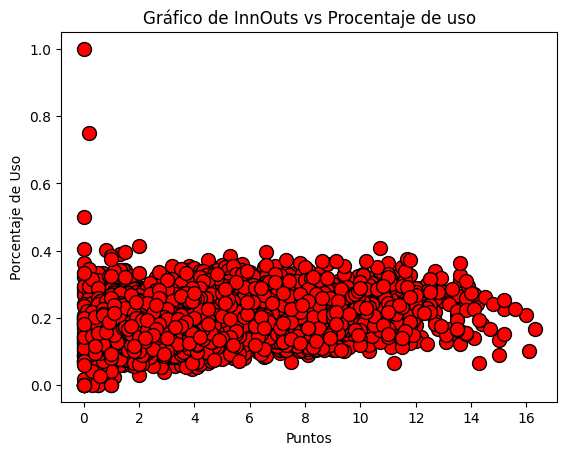

In [23]:
def plotData(x, y):
    fig = plt.figure()  # Abre una nueva figura
    plt.plot(x, y, 'ro', ms=10, mec='k')  # Gráfica de puntos rojos con borde negro
    plt.ylabel('Porcentaje de Uso')  # Etiqueta para el eje y
    plt.xlabel('Puntos')  # Etiqueta para el eje x
    plt.title('Gráfico de InnOuts vs Procentaje de uso')  # Título del gráfico
    plt.show()  # Muestra la gráfica

# Para ver que todo funcione correctamente imprimiremos el uso del jugador dependiendo de la altura de este siendo la edad entre los 1.80 a los 2.18 las mejores alturas a considerar
plotData(X[:, 6], y)


El código agrega una nueva columna a la matriz 
𝑋
, que contiene el cuadrado de cada valor en 
𝑋
. Esto transforma los datos para capturar relaciones no lineales. La matriz resultante tiene el doble de columnas, combinando los valores originales con sus cuadrados.

In [24]:
X = np.concatenate([X, X * X], axis=1)
print(X.shape)

(10430, 18)


El código muestra los primeros 5 datos de cada columna en la matriz 
𝑋
. Esto permite revisar cómo se ven los datos originales y sus transformaciones para asegurar que la transformación se realizó correctamente.

In [25]:

print("Primeros 5 datos de cada columna de X y X * X:")
num_cols = X.shape[1]

for i in range(num_cols):
    print(f"Columna {i} (primeros 5 elementos):")
    print(X[:5, i])

Primeros 5 datos de cada columna de X y X * X:
Columna 0 (primeros 5 elementos):
[22. 28. 26. 30. 23.]
Columna 1 (primeros 5 elementos):
[193.04 190.5  203.2  203.2  213.36]
Columna 2 (primeros 5 elementos):
[ 94.800728  86.18248  103.418976 102.0582   119.748288]
Columna 3 (primeros 5 elementos):
[42. 34. 12.  7. 22.]
Columna 4 (primeros 5 elementos):
[64.  4. 41. 64. 52.]
Columna 5 (primeros 5 elementos):
[ 3.9  3.8  8.3 10.2  2.8]
Columna 6 (primeros 5 elementos):
[1.5 1.3 6.4 2.8 1.7]
Columna 7 (primeros 5 elementos):
[2.4 0.3 1.9 1.7 0.3]
Columna 8 (primeros 5 elementos):
[  0.3   8.9  -8.2  -2.7 -14.1]
Columna 9 (primeros 5 elementos):
[484. 784. 676. 900. 529.]
Columna 10 (primeros 5 elementos):
[37264.4416 36290.25   41290.24   41290.24   45522.4896]
Columna 11 (primeros 5 elementos):
[ 8987.17802933  7427.41985895 10695.48459689 10415.87618724
 14339.65247893]
Columna 12 (primeros 5 elementos):
[1764. 1156.  144.   49.  484.]
Columna 13 (primeros 5 elementos):
[4096.   16. 168

### Normalización de Características

La normalización de características es el proceso de ajustar los datos para que tengan una media de 0 y una desviación estándar de 1. Este proceso mejora el rendimiento y la estabilidad del aprendizaje automático.

**Pasos Clave:**

1. **Cálculo de la Media (\( \mu \))**:
   - La media de cada característica se calcula para centrar los datos alrededor de 0.

2. **Cálculo de la Desviación Estándar (\( \sigma \))**:
   - La desviación estándar de cada característica se calcula para ajustar la escala de los datos.

3. **Evitación de División por Cero**:
   - Si la desviación estándar es cero (lo que indicaría que todos los valores son idénticos), se reemplaza por 1 para evitar problemas de división por cero.

4. **Normalización**:
   - Los datos se normalizan restando la media y dividiendo por la desviación estándar.

**Fórmula de Normalización:**

$$
X_{\text{norm}} = \frac{X - \mu}{\sigma}
$$

donde:
- \( X \) es la matriz de datos original.
- \( \mu \) es el vector de medias.
- \( \sigma \) es el vector de desviaciones estándar.

Este proceso asegura que todas las características tengan una escala similar, lo que facilita el entrenamiento de los modelos.


In [26]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma = np.where(sigma == 0, 1, sigma)  # Evitar división por cero
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [27]:
X_norm, mu, sigma = featureNormalize(X)
print("Medias después de la normalización (deberían estar cerca de 0):")
print(np.mean(X_norm, axis=0))
print("Desviaciones estándar después de la normalización (deberían estar cerca de 1):")
print(np.std(X_norm, axis=0))

print("X normalizado:")
print(X_norm)
print("Medias (mu):")
print(mu)
print("Desviaciones estándar (sigma):")
print(sigma)

Medias después de la normalización (deberían estar cerca de 0):
[-5.44999222e-18 -1.80394743e-15  3.16099549e-16  2.86124592e-17
 -4.90499300e-17  5.44999222e-18  1.66224763e-16 -2.72499611e-17
 -1.70312257e-17 -1.68949759e-16  4.74149323e-16 -2.88849588e-16
  1.49874786e-17 -9.80998600e-17 -3.81499455e-17  1.40337300e-16
 -1.08999844e-17 -1.49874786e-17]
Desviaciones estándar después de la normalización (deberían estar cerca de 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
X normalizado:
[[-1.12639037 -0.91906258 -0.50950608 ... -0.66360895 -0.10917318
  -0.12015042]
 [ 0.21124762 -1.20405132 -1.20671796 ... -0.68313347 -0.49746848
  -0.03869363]
 [-0.23463171  0.22089236  0.18770579 ...  0.68602391 -0.25641038
  -0.05101716]
 ...
 [ 0.43418729  1.3608473   2.09586459 ...  2.8853223   0.70439791
  -0.04051591]
 [-0.45757137  0.50588109  0.11431506 ...  0.73100005 -0.40501722
  -0.12020189]
 [-0.68051104  0.79086983  0.99500374 ...  0.02811712 -0.48651129
  -0.07402726]]


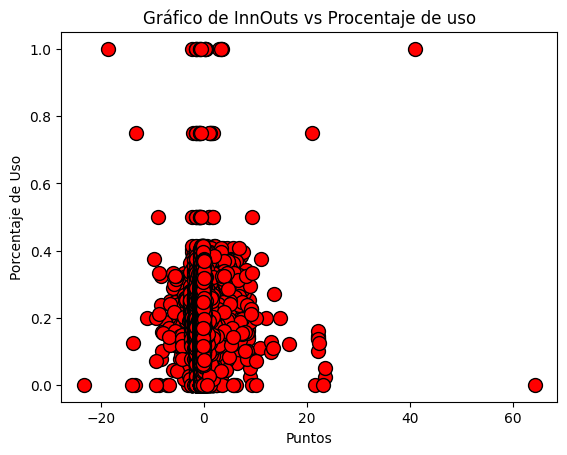

In [28]:
plotData(X_norm, y)

Se añade una columna de unos a la matriz normalizada. Esto es para incluir el término de sesgo en el modelo de regresión, permitiendo ajustar el modelo a una línea que no pasa necesariamente por el origen. La nueva columna de unos ayuda a incorporar el término de intercepto en la regresión.



In [29]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

Mostramos las nuevas matrices

In [30]:
print(X)
print(X.shape)

[[ 1.         -1.12639037 -0.91906258 ... -0.66360895 -0.10917318
  -0.12015042]
 [ 1.          0.21124762 -1.20405132 ... -0.68313347 -0.49746848
  -0.03869363]
 [ 1.         -0.23463171  0.22089236 ...  0.68602391 -0.25641038
  -0.05101716]
 ...
 [ 1.          0.43418729  1.3608473  ...  2.8853223   0.70439791
  -0.04051591]
 [ 1.         -0.45757137  0.50588109 ...  0.73100005 -0.40501722
  -0.12020189]
 [ 1.         -0.68051104  0.79086983 ...  0.02811712 -0.48651129
  -0.07402726]]
(10430, 19)


### Cálculo del Costo en Regresión Multivariable

En regresión multivariable, el costo mide la discrepancia entre las predicciones del modelo y los valores reales de los datos. Se utiliza para evaluar el rendimiento del modelo y ajustar los parámetros para mejorar el ajuste.

**Fórmula del Costo:**

El costo se calcula con la fórmula:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h(X_i) - y_i \right)^2
$$

donde:
- \( J(\theta) \) es el costo del modelo.
- \( m \) es el número de ejemplos en el conjunto de datos.
- \( h(X_i) \) es la predicción del modelo para el ejemplo \( i \), calculada como \( h(X) = X \theta \).
- \( y_i \) es el valor real para el ejemplo \( i \).

**Componentes:**
- **Predicción del Modelo**: \( h(X) = X \theta \), donde \( X \) es la matriz de características y \( \theta \) es el vector de parámetros.
- **Error Cuadrático**: Calcula el cuadrado de la diferencia entre las predicciones y los valores reales.
- **Promedio**: Se promedia el error cuadrático para obtener el costo final.

Este cálculo es fundamental para evaluar y optimizar el rendimiento del modelo de regresión.


In [31]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

### Descenso por Gradiente en Regresión Multivariable

El descenso por gradiente es un método de optimización utilizado para ajustar los parámetros del modelo y minimizar el costo. En la regresión multivariable, se ajustan los parámetros \(\theta\) para mejorar el ajuste del modelo a los datos.

**Proceso del Descenso por Gradiente:**

1. **Inicialización**:
   - Se inicializan los parámetros del modelo (\(\theta\)) y se prepara una lista para almacenar el historial del costo.

2. **Iteraciones**:
   - En cada iteración del algoritmo:
     - **Actualización de Parámetros**: Los parámetros \(\theta\) se actualizan utilizando la fórmula:
       
       $$
       \theta := \theta - \frac{\alpha}{m} \left( X^T (X \theta - y) \right)
       $$

       donde:
       - \(\alpha\) es la tasa de aprendizaje.
       - \(m\) es el número de ejemplos.
       - \(X\) es la matriz de características.
       - \(y\) es el vector de valores reales.

     - **Cálculo del Costo**: Se calcula el costo actualizado utilizando `computeCostMulti` y se almacena en el historial.

3. **Resultado**:
   - **Parámetros Ajustados**: Se devuelve el vector de parámetros \(\theta\) ajustado.
   - **Historial del Costo**: Se devuelve una lista con los valores del costo a lo largo de las iteraciones, útil para verificar la convergencia.

Este método ajusta iterativamente los parámetros del modelo para minimizar el costo, mejorando así el ajuste del modelo a los datos.


In [32]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

Costo final después del descenso por gradiente: 0.0006


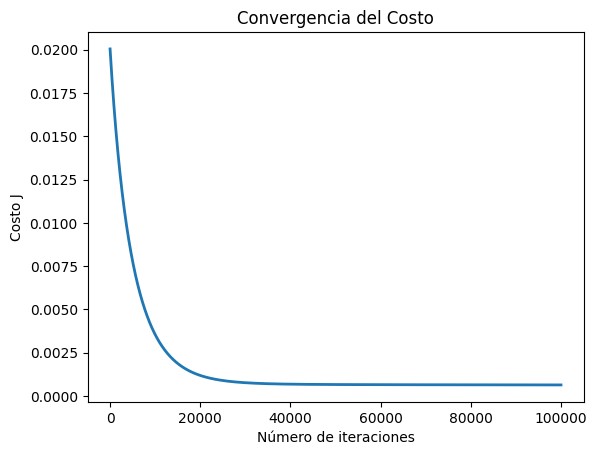

Theta calculado por el descenso por el gradiente: [ 0.19646521 -0.00411958 -0.00237152 -0.00071637 -0.00063301 -0.00687519
  0.0323848  -0.01362509 -0.00483987 -0.00116421 -0.0040987  -0.00039887
  0.00481362 -0.00159109 -0.0028175   0.01879404  0.00170835 -0.00198986
  0.01380984]
Shape of X_array_normalized: (19,)
Shape of theta: (19,)
La capacidad adquisitiva para la instancia dada (usando el descenso por el gradiente): $-1.44


In [33]:
# Elegir algún valor para alpha (probar varias alternativas)
num_samples = 1000
X = X[:num_samples]
y = y[:num_samples]
alpha = 0.0001
num_iters = 100000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Imprimir el costo final después del descenso por gradiente
print('Costo final después del descenso por gradiente: {:.4f}'.format(J_history[-1]))

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Costo')
pyplot.show()

# Muestra los resultados del descenso por el gradiente
print('Theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = np.array([1985, 300, 10, 5, 2, 80, 40, 0.270, 15, 3, 20, 5, 8, 2, 10, 12, 3, 1])

# Normalizar X_array
X_array_normalized = (X_array - mu) / sigma

# Añadir el término de sesgo (1) al inicio
X_array_normalized = np.insert(X_array_normalized, 0, 1)  # Insertar 1 para el término de sesgo

# Asegúrate de que X_array_normalized tenga el mismo número de columnas que theta
if X_array_normalized.shape[0] != theta.shape[0]:
    raise ValueError(f"Dimensiones incompatibles: X_array_normalized tiene {X_array_normalized.shape[0]} columnas, pero theta tiene {theta.shape[0]} columnas")

# Calcular la predicción
price = np.dot(X_array_normalized, theta)

# Imprimir el resultado
print("Shape of X_array_normalized:", np.shape(X_array_normalized))
print("Shape of theta:", np.shape(theta))
print('La capacidad adquisitiva para la instancia dada (usando el descenso por el gradiente): ${:.2f}'.format(price))

[np.float64(0.02004956362151499), np.float64(0.020045232518189984), np.float64(0.020040902689463843), np.float64(0.02003657413477582), np.float64(0.020032246853565524), np.float64(0.020027920845272926), np.float64(0.020023596109338362), np.float64(0.020019272645202552), np.float64(0.020014950452306553), np.float64(0.020010629530091813), np.float64(0.02000630987800012), np.float64(0.02000199149547365), np.float64(0.019997674381954923), np.float64(0.019993358536886836), np.float64(0.01998904395971264), np.float64(0.019984730649875954), np.float64(0.01998041860682076), np.float64(0.019976107829991402), np.float64(0.019971798318832584), np.float64(0.01996749007278937), np.float64(0.019963183091307186), np.float64(0.019958877373831833), np.float64(0.01995457291980944), np.float64(0.019950269728686534), np.float64(0.019945967799909984), np.float64(0.01994166713292701), np.float64(0.019937367727185212), np.float64(0.01993306958213253), np.float64(0.019928772697217285), np.float64(0.0199244770

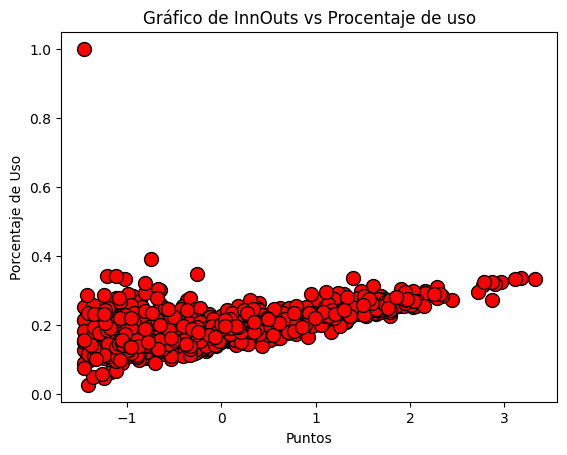

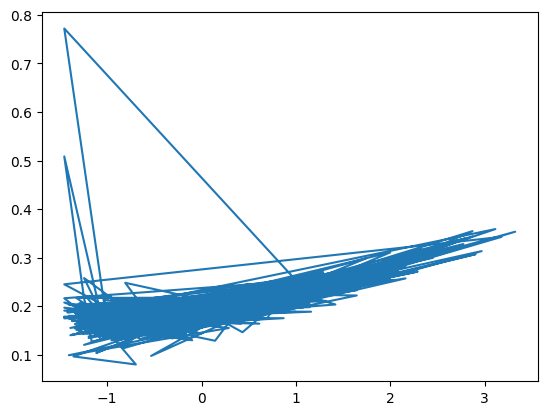

In [34]:
print(J_history)
print(X.shape)
print(y.shape)
plotData(X[:, 6], y)
pyplot.plot(X[:, 6], np.dot(X, theta), '-')

# ***2. Ecuación de la Normal***

La ecuación de la normal es un método analítico para encontrar los parámetros óptimos en un modelo de regresión lineal. A diferencia del descenso por gradiente, que es un método iterativo, la ecuación de la normal proporciona una solución directa.

**Fórmula General:**

La fórmula para calcular los parámetros óptimos (\(\theta\)) es:

$$
\theta = (X^T X)^{-1} X^T y
$$

donde:
- \( X \) es la matriz de características (con un término de sesgo añadido si es necesario).
- \( y \) es el vector de valores reales.
- \( X^T \) es la transpuesta de la matriz de características.
- \( (X^T X)^{-1} \) es la inversa de la matriz producto de \( X^T \) y \( X \).

**Proceso:**

1. **Cálculo de \( X^T X \)**:
   - Multiplica la transpuesta de \( X \) por \( X \) para obtener una matriz cuadrada.

2. **Inversión de la Matriz**:
   - Calcula la inversa de la matriz obtenida en el paso anterior.

3. **Multiplicación por \( X^T y \)**:
   - Multiplica la matriz inversa por \( X^T y \) para obtener los parámetros \(\theta\).

**Ventajas:**
- **Solución Directa**: No requiere iteraciones como el descenso por gradiente.
- **Precisión**: Proporciona una solución exacta, siempre que \( (X^T X) \) sea invertible.

**Limitaciones:**
- **Computacionalmente Costosa**: Puede ser ineficiente para grandes conjuntos de datos debido al cálculo de la inversa de la matriz.
- **Inversibilidad**: Requiere que \( (X^T X) \) sea una matriz invertible.

La ecuación de la normal es una herramienta fundamental en la regresión lineal para encontrar soluciones precisas y rápidas cuando el tamaño del conjunto de datos es manejable.


In [35]:
# Cargar el CSV con pandas
df = pd.read_csv('all_seasons.csv')

# Eliminar filas que contengan "Undrafted"
df_cleaned = df[~df.apply(lambda x: x.astype(str).str.contains('Undrafted').any(), axis=1)]

# Convertir todas las columnas a numéricas, forzando errores a NaN
df_numeric = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Verificar las filas que han sido convertidas a NaN y eliminarlas solo si son relevantes
# Por ejemplo, si quieres asegurarte de que todas las columnas relevantes sean numéricas, pero no eliminar demasiado

# Selecciona solo las columnas relevantes
columnas_relevantes = df_numeric.columns[~df_numeric.columns.isin(df_cleaned.columns[columnas_a_eliminar])]
df_relevant = df_numeric[columnas_relevantes]

# Eliminar filas con NaN en las columnas relevantes
df_cleaned_relevant = df_relevant.dropna()

# Convertir el DataFrame filtrado a numpy array
data = df_cleaned_relevant.to_numpy()

# Ajustar el índice de columnas a eliminar según las columnas que se han mantenido
# Asegúrate de actualizar el índice de columnas según las que no has eliminado.
# Aquí asumimos que se han mantenido todas las columnas relevantes.

cantidad_columnas = data.shape[1]
print(f"La cantidad de columnas restantes es: {cantidad_columnas}")

# Asegurarse de que estamos usando las 9 características más la variable dependiente
if cantidad_columnas != 10:
    raise ValueError("El número de columnas no es el esperado")

X = data[:, :-1]  # Selecciona todas menos la última columna (ERA)
y = data[:, -1]
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

La cantidad de columnas restantes es: 10


In [36]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [37]:
theta = normalEqn(X, y)
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));
X_array = [1, 34, 1156]
X_array[2:18] = (X_array[2:18] - mu) / sigma
X_array = X_array[:19]
price = np.dot(X_array, theta)


Theta calculado a partir de la ecuación de la normal: [ 1.39757021e+00 -5.14599011e-03 -1.04605014e-02 -2.52920196e-03
 -5.91408942e-05 -4.22785111e-04  1.19542815e-02 -1.56478161e-02
 -6.70915268e-03 -2.82356565e-04  7.05394551e-05  2.63247543e-05
  1.45781714e-05 -6.33732926e-07  2.91864778e-07 -9.87839327e-05
  7.38045221e-04  5.25354397e-04  1.54297744e-06]


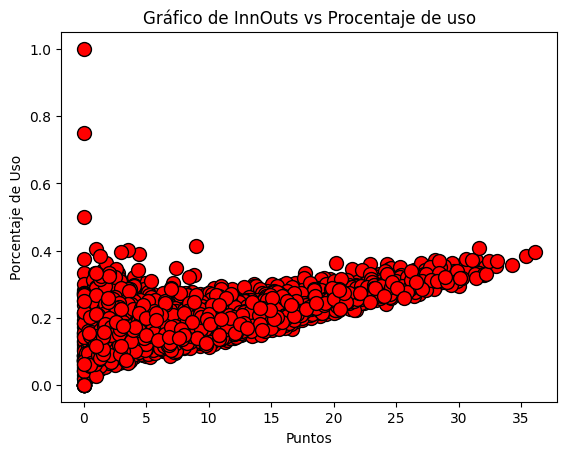

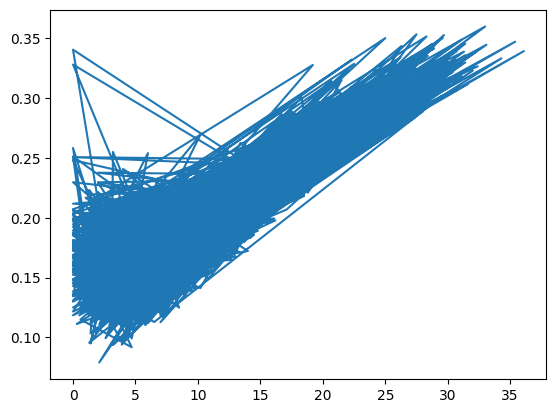

In [38]:
plotData(X[:, 6], y)
pyplot.plot(X[:, 6], np.dot(X, theta), '-')

# ***3. Regresion Lineal Multiple***

### Regresión Lineal Múltiple

La regresión lineal múltiple extiende la regresión lineal simple para modelar la relación entre varias características independientes y una variable dependiente. A diferencia de la regresión lineal simple, que utiliza una sola característica para hacer predicciones, la regresión lineal múltiple utiliza múltiples características.

**Modelo de Regresión Lineal Múltiple:**

El modelo se puede expresar como:

$$
h(X) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n
$$

donde:
- \( h(X) \) es la predicción del modelo.
- \( \theta_0 \) es el término de sesgo (intercepto).
- \( \theta_1, \theta_2, \ldots, \theta_n \) son los coeficientes de las características \( x_1, x_2, \ldots, x_n \).

**Cálculo del Costo:**

El costo se mide usando el error cuadrático medio:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h(X_i) - y_i \right)^2
$$

donde:
- \( m \) es el número de ejemplos.
- \( h(X_i) \) es la predicción para el ejemplo \( i \).
- \( y_i \) es el valor real para el ejemplo \( i \).

**Optimización:**

El algoritmo de descenso de gradiente se utiliza para encontrar los valores óptimos de los parámetros \( \theta \) que minimizan el costo.


In [39]:
# Cargar el CSV con pandas
df = pd.read_csv('all_seasons.csv')

# Eliminar filas que contengan "Undrafted"
df_cleaned = df[~df.apply(lambda x: x.astype(str).str.contains('Undrafted').any(), axis=1)]

# Convertir todas las columnas a numéricas, forzando errores a NaN
df_numeric = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Verificar las filas que han sido convertidas a NaN y eliminarlas solo si son relevantes
# Por ejemplo, si quieres asegurarte de que todas las columnas relevantes sean numéricas, pero no eliminar demasiado

# Selecciona solo las columnas relevantes
columnas_relevantes = df_numeric.columns[~df_numeric.columns.isin(df_cleaned.columns[columnas_a_eliminar])]
df_relevant = df_numeric[columnas_relevantes]

# Eliminar filas con NaN en las columnas relevantes
df_cleaned_relevant = df_relevant.dropna()

# Convertir el DataFrame filtrado a numpy array
data = df_cleaned_relevant.to_numpy()

# Ajustar el índice de columnas a eliminar según las columnas que se han mantenido
# Asegúrate de actualizar el índice de columnas según las que no has eliminado.
# Aquí asumimos que se han mantenido todas las columnas relevantes.

cantidad_columnas = data.shape[1]
print(f"La cantidad de columnas restantes es: {cantidad_columnas}")

# Asegurarse de que estamos usando las 9 características más la variable dependiente
if cantidad_columnas != 10:
    raise ValueError("El número de columnas no es el esperado. Se esperaban 10 columnas (9 características + 1 ERA).")


# Asegurarse de que X tenga 9 columnas y y tenga 1 columna
X = data[:, :-1]  # Selecciona todas menos la última columna (ERA)
y = data[:, -1]   # Selecciona la última columna (ERA) como variable dependiente

# Obtener la cantidad de ejemplos
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(20):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

La cantidad de columnas restantes es: 10
10430
  X[:,0] X[:, 1]         y
--------------------------
      22     193         0
      28     190         0
      26     203         0
      30     203         0
      23     213         0
      33     198         0
      26     231         0
      30     203         0
      24     201         0
      24     203         0
      22     203         0
      31     206         0
      29     185         0
      33     216         0
      28     211         0
      26     193         0
      25     198         0
      24     218         0
      34     213         0
      31     206         0


### Normalización de Características

La normalización de características ajusta los datos para que tengan una media de 0 y una desviación estándar de 1. Este proceso es crucial para mejorar la eficiencia y la convergencia de los algoritmos de aprendizaje automático.

**Pasos en la Normalización:**

1. **Cálculo de la Media (\( \mu \))**:
   - La media de cada característica se calcula para centrar los datos alrededor de 0.

2. **Cálculo de la Desviación Estándar (\( \sigma \))**:
   - La desviación estándar de cada característica se calcula para escalar los datos a una unidad de medida común.

3. **Normalización de Datos**:
   - Cada valor en los datos se ajusta restando la media y dividiendo por la desviación estándar.

**Fórmula de Normalización:**

$$
X_{\text{norm}} = \frac{X - \mu}{\sigma}
$$

donde:
- \( X \) es la matriz de datos original.
- \( \mu \) es el vector de medias.
- \( \sigma \) es el vector de desviaciones estándar.

Este proceso transforma los datos de manera que tengan una media de 0 y una desviación estándar de 1, facilitando el aprendizaje del modelo.


In [40]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [41]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 2.20000000e+01  1.93040000e+02  9.48007280e+01 ...  1.50000000e+00
   2.40000000e+00  3.00000000e-01]
 [ 2.80000000e+01  1.90500000e+02  8.61824800e+01 ...  1.30000000e+00
   3.00000000e-01  8.90000000e+00]
 [ 2.60000000e+01  2.03200000e+02  1.03418976e+02 ...  6.40000000e+00
   1.90000000e+00 -8.20000000e+00]
 ...
 [ 2.90000000e+01  2.13360000e+02  1.27005760e+02 ...  1.02000000e+01
   4.20000000e+00  8.80000000e+00]
 [ 2.50000000e+01  2.05740000e+02  1.02511792e+02 ...  6.50000000e+00
   1.20000000e+00 -2.00000000e-01]
 [ 2.40000000e+01  2.08280000e+02  1.13398000e+02 ...  4.70000000e+00
   5.00000000e-01 -6.70000000e+00]]
Media calculada: [ 27.05244487 201.2312675  101.09874152  21.88887824  54.50450623
   9.01252157   3.85813039   1.96207095  -1.8630489 ]
Desviación estandar calculada: [ 4.48551854  8.91263297 12.3610173  16.05061568 23.50815792  6.19681486
  2.52950159  1.87201921 10.6453118 ]
[[-1.12639037 -0.91906258 -0.50950608 ... -0.932251    0.23393406
   0.20319263]
 [ 0

In [42]:
# Añade el termino de interseccion a X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


print(X)

[[ 1.         -1.12639037 -0.91906258 ... -0.932251    0.23393406
   0.20319263]
 [ 1.          0.21124762 -1.20405132 ... -1.01131796 -0.8878493
   1.01105999]
 [ 1.         -0.23463171  0.22089236 ...  1.00488951 -0.03315722
  -0.59528093]
 ...
 [ 1.          0.43418729  1.3608473  ...  2.50716174  1.19546265
   1.00166619]
 [ 1.         -0.45757137  0.50588109 ...  1.04442299 -0.407085
   0.1562236 ]
 [ 1.         -0.68051104  0.79086983 ...  0.33282035 -0.78101279
  -0.45437383]]


### Cálculo del Costo en Regresión Multivariable

La función `computeCostMulti` calcula el costo del modelo de regresión multivariable, que mide el error entre las predicciones del modelo y los valores reales. 

**Fórmula del Costo:**

El costo se calcula utilizando el error cuadrático medio:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h(X_i) - y_i \right)^2
$$

donde:
- \( m \) es el número de ejemplos en el conjunto de datos.
- \( h(X_i) \) es la predicción del modelo para el ejemplo \( i \).
- \( y_i \) es el valor real para el ejemplo \( i \).

El término \( \frac{1}{2m} \) asegura que el costo sea un promedio de los errores cuadrados y evita el uso de un factor de 2 en las derivadas durante la optimización.


In [43]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [44]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

Costo final después del descenso por gradiente: 0.0006
theta calculado por el descenso por el gradiente: [ 0.18891721 -0.00568807 -0.00195547  0.00455075 -0.00200514 -0.01044377
  0.04841855 -0.01108648 -0.00107149 -0.00431154]
(10,)


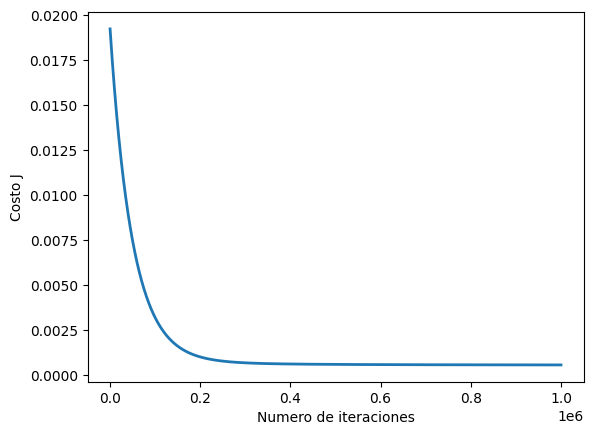

In [45]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.00001 # alpha = 0.0001
num_iters = 1000000
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
print('Costo final después del descenso por gradiente: {:.4f}'.format(J_history[-1]))
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 1650, 3]
X_array[2:9] = (X_array[2:9] - mu) / sigma
X_array = X_array[:10]
print(theta.shape)
price = np.dot(X_array, theta)   # Se debe cambiar esto
